# Week10 - MNIST 숫자 데이터 분류 모델 생성 / CNN - 딥러닝

202334716 이예나

---

### CNN (Convolutional Neural Network)

: 주로 이미지나 비디오와 같은 2D 또는 3D 데이터를 처리하는 데 최적화된 딥러닝 모델  
일반적으로 이미지 분류나 객체 인식과 같은 비전 관련 문제를 해결하는 데 사용

CNN의 핵심 아이디어는 합성곱(convolution) 연산을 통해 입력 이미지에서 특징(feature)을 추출하는 것  
이 방식은 이미지에서 중요한 특징을 찾고, 그 특징들을 조합하여 더 높은 수준의 정보를 얻는 방식

---

### CNN 구성 요소

1. 합성곱 계층 (Convolutional Layer)  
   - 입력 이미지에 필터(filter) 또는 커널(kernel)을 슬라이딩하며 합성곱 연산을 수행하여 특성 맵(feature map)을 생성  
   - 이미지에서 중요한 특징을 추출  
     - 예: 가장자리(edge), 선(line), 질감(texture) 등을 인식

2. 풀링 계층 (Pooling Layer)  
   - Max Pooling 또는 Average Pooling 등의 방법으로 이미지의 공간적인 크기를 줄인다  
   - 계산량을 줄이고, 모델의 일반화 성능을 향상  
   - 일반적으로 2x2나 3x3 크기의 풀링 커널을 사용

3. 완전 연결 계층 (Fully Connected Layer)  
   - 합성곱 계층과 풀링 계층을 통해 추출된 특징을 바탕으로 결정을 내리는 계층  
   - 이 계층에서는 전통적인 DNN (Deep Neural Network) 방식으로 뉴런들이 연결된다

4. 활성화 함수 (Activation Function)  
   - 각 뉴런에 비선형성을 추가하여 신경망이 복잡한 패턴을 학습한다  
   - ReLU (Rectified Linear Unit) 함수가 주로 사용된다

5. 출력 계층 (Output Layer)  
   - Softmax와 같은 활성화 함수를 사용하여 클래스별 확률을 계산하고, 최종적인 분류 결과를 출력

---

### CNN 특징

1. 지역적 연결  
   - CNN은 각 뉴런이 전체 이미지에 연결되지 않고, 일정 범위의 지역만을 보고 학습  
   - 이미지에서 중요한 지역적 패턴을 추출하는 데 효과적

2. 파라미터 공유  
   - 동일한 필터가 이미지의 모든 영역에 적용되므로 파라미터 수가 대폭 줄어들어 모델이 효율적으로 학습할 수 있다

3. 계층적 학습  
   - CNN은 저수준의 특징(엣지, 텍스처 등)을 추출한 후, 고수준의 복잡한 패턴을 학습


---

### 라이브러리 불러오기

In [5]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models

### MNIST 숫자 데이터셋 불러오기

In [7]:
# MNIST 데이터셋 불러오기
(x_train, y_train), (x_test, y_test) = datasets.mnist.load_data()

### 데이터 전처리 및 정규화

In [9]:
x_train = x_train.reshape((60000, 28, 28, 1))  # (batch_size, height, width, channels)
x_test = x_test.reshape((10000, 28, 28, 1))
x_train, x_test = x_train / 255.0, x_test / 255.0  # 픽셀 값 정규화

### 모델 생성 및 훈련

In [11]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1))) # 합성곱 계층
model.add(layers.MaxPooling2D((2, 2))) # 최대 풀링 계층
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Flatten()) # 평탄화 계층
model.add(layers.Dense(64, activation='relu')) # 완전 연결(Dense)
model.add(layers.Dense(10, activation='softmax')) # 출력

/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


- **Conv2D**

    : 2차원 이미지에 적용하는 합성곱(Convolution) 계층

    32 : 필터의 개수. 즉, 이 계층이 32개의 특징 맵(feature map)을 추출

    (3, 3) : 필터의 크기 (커널). 3x3 크기의 작은 윈도우가 이미지 위를 슬라이딩하며 특징을 추출

    input_shape=(28, 28, 1) : 입력 이미지의 형태. (높이, 너비, 채널 수)로, MNIST 데이터처럼 28x28 크기의 흑백 이미지는 채널이 1이다


- **최대 풀링(Max Pooling) 계층**

    (2, 2) : 2x2 크기의 영역에서 가장 큰 값만 추출하여 특성 맵의 크기를 절반으로 줄인다

    계산량을 줄이고, 특징의 위치 변화에 덜 민감하게 만들어준다 (불변성)


- **평탄화(Flatten) 계층**

    2차원으로 된 출력(feature map)을 1차원 벡터로 변환

    완전 연결(Dense) 계층으로 연결하기 위한 전처리 과정

In [13]:
# 모델 요약 출력
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 3, 3, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 576)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 93,322 (364.54 KB)

 Trainable params: 93,322 (364.54 KB)

 Non-trainable params: 0 (0.00 B)

In [14]:
# 모델 컴파일
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [15]:
# 모델 훈련
history = model.fit(
    x_train, y_train,
    epochs=5,
    validation_split=0.1,
)

Epoch 1/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8779 - loss: 0.3779 - val_accuracy: 0.9808 - val_loss: 0.0548
Epoch 2/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.9835 - loss: 0.0512 - val_accuracy: 0.9878 - val_loss: 0.0373
Epoch 3/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.9885 - loss: 0.0359 - val_accuracy: 0.9908 - val_loss: 0.0289
Epoch 4/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9921 - loss: 0.0249 - val_accuracy: 0.9903 - val_loss: 0.0339
Epoch 5/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9941 - loss: 0.0205 - val_accuracy: 0.9917 - val_loss: 0.0347


### 예측 및 평가

In [17]:
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt

In [18]:
# 예측 수행
y_pred = model.predict(x_test)
y_pred_class = np.argmax(y_pred, axis=1)  # 모델이 예측한 클래스

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [19]:
# 분류 리포트 출력
print("Classification Report:\n", classification_report(y_test, y_pred_class))
print("=============================================")

# 혼동 행렬 출력
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_class))

Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99       980
           1       1.00      1.00      1.00      1135
           2       1.00      0.99      0.99      1032
           3       0.98      1.00      0.99      1010
           4       0.99      0.98      0.99       982
           5       0.99      0.99      0.99       892
           6       1.00      0.99      0.99       958
           7       0.99      0.99      0.99      1028
           8       0.99      0.99      0.99       974
           9       0.98      0.99      0.98      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000

Confusion Matrix:
 [[ 973    0    1    0    1    0    3    1    1    0]
 [   0 1131    0    2    0    1    0    1    0    0]
 [   0    0 1025    2    1    0    0    3    1    0]
 [   0    0    0 1009    0    1    0   

### 정확도 시각화

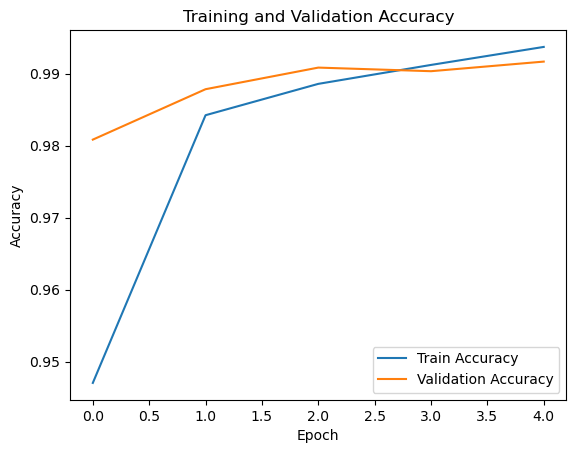

In [21]:
# 학습 정확도 시각화
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

### 테스트 데이터 시각화 & 예측 결과

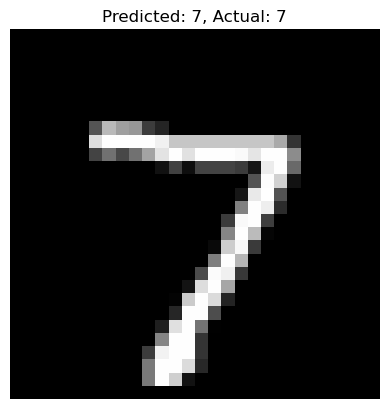

In [23]:
plt.imshow(x_test[0].reshape(28, 28), cmap='gray')
plt.title(f"Predicted: {y_pred_class[0]}, Actual: {y_test[0]}")
plt.axis('off')
plt.show()

### 모델이 정확하게 예측한 이미지 (0~9)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


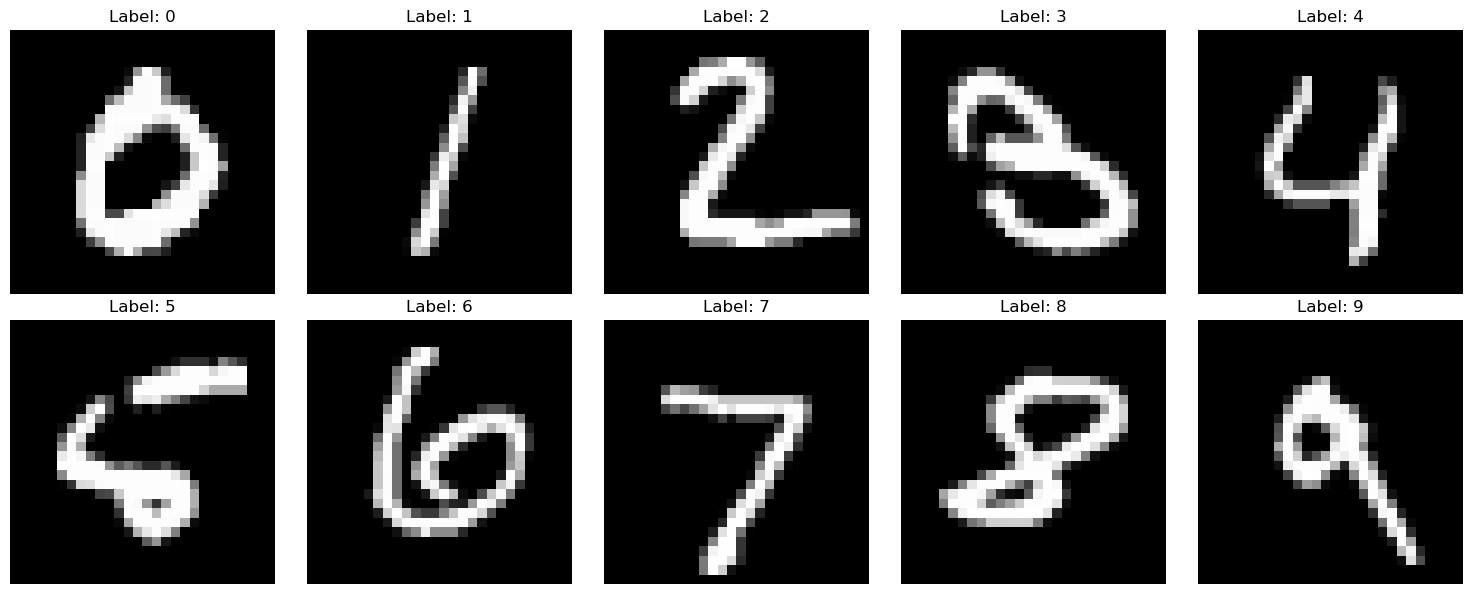

In [25]:
import numpy as np
import matplotlib.pyplot as plt

# 모델 예측
predictions = model.predict(x_test)
predicted_labels = np.argmax(predictions, axis=1)
true_labels = y_test

# 0부터 9까지 정확히 맞춘 이미지 인덱스를 저장할 딕셔너리
correct_indices = {}

# 전체 테스트셋에서 각 숫자에 대해 정확히 맞춘 첫 번째 인덱스를 수집
for i in range(len(x_test)):
    true = true_labels[i]
    pred = predicted_labels[i]

    if true == pred and true not in correct_indices:
        correct_indices[true] = i
        if len(correct_indices) == 10:
            break

# 시각화
plt.figure(figsize=(15, 6))
for idx, digit in enumerate(range(10)):
    i = correct_indices[digit]
    plt.subplot(2, 5, idx + 1)
    plt.imshow(x_test[i].reshape(28, 28), cmap='gray')
    plt.title(f"Label: {digit}")
    plt.axis('off')

plt.tight_layout()
plt.show()

### 모델이 틀리게 예측한 이미지 (0~9)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


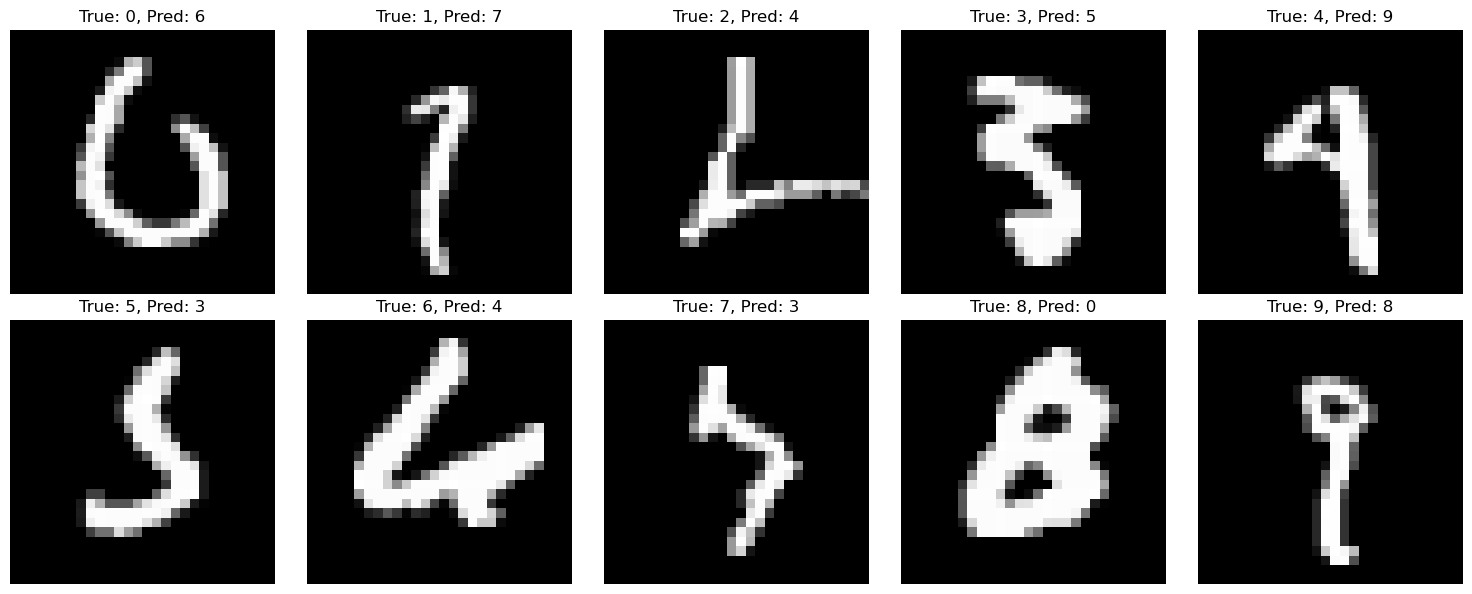

In [27]:
import numpy as np
import matplotlib.pyplot as plt

# 예측값 및 실제값
predictions = model.predict(x_test)
predicted_labels = np.argmax(predictions, axis=1)
true_labels = y_test

# 0~9까지 틀린 예측 중 하나씩 저장할 딕셔너리
wrong_indices = {}

# 틀린 예측 중에서 각 숫자당 하나씩만 선택
for i in range(len(x_test)):
    true = true_labels[i]
    pred = predicted_labels[i]
    
    if true != pred:
        if true not in wrong_indices:
            wrong_indices[true] = i
        if len(wrong_indices) == 10:
            break

# 시각화
plt.figure(figsize=(15, 6))
for idx, digit in enumerate(range(10)):
    i = wrong_indices[digit]
    plt.subplot(2, 5, idx + 1)
    plt.imshow(x_test[i].reshape(28, 28), cmap='gray')
    plt.title(f"True: {true_labels[i]}, Pred: {predicted_labels[i]}")
    plt.axis('off')

plt.tight_layout()
plt.show()